In [1]:
import numpy as np
import pandas as pd
import re
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, recall_score, classification_report,confusion_matrix, f1_score
import glob
import os
import matplotlib.pyplot as plt

In [2]:
# train_path = max(glob.glob('./data/twitter_data_train/*.csv'), key=os.path.getctime) 
# test_path = max(glob.glob('./data/test/*.csv'), key=os.path.getctime) 
train_df = pd.read_csv('./data/twitter_data_train_multiclass.csv')
test_df = pd.read_csv('./data/twitter_data_test_multiclass.csv')

print(train_df.shape)
print(test_df.shape)

(9445, 235)
(1667, 235)


In [3]:
to_drop = ['screen_name', 'url', 'profile_image_url', 'description',
           'id', 'name', 'account_type','account_type_multi', 'tweets_list', 'tweets_list_processed',
          'description_processed', 'protected', 'verified']

X_train, y_train = train_df.drop(to_drop, axis=1), train_df['account_type_multi']
X_test, y_test = test_df.drop(to_drop, axis=1), test_df['account_type_multi']

In [4]:
X_train.columns[:30]

Index(['Unnamed: 0', 'statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_use_background_image',
       'profile_background_tile', 'tweet_frequency', 'number_of_tags',
       'number_of_mentions', 'tweet_weekend_frequency',
       'tweet_weekday_frequency', 'following_to_followers_ratio',
       'username_length', 'screen_name_length', 'username_spec_char_count',
       'screen_name_spec_char_count', 'has_url', 'tweets_0', 'tweets_1',
       'tweets_2', 'tweets_3', 'tweets_4', 'tweets_5', 'tweets_6', 'tweets_7'],
      dtype='object')

In [4]:
# Combine train and test data set tgt

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [5]:
# Check if dataset is balanced
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9445, 222)
(9445,)
(1667, 222)
(1667,)


In [8]:
#Default model
model_xgboost_default = xgb.XGBClassifier(objective='multi:softprob')

model_xgboost_default.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=[(X_test, y_test)],
                  verbose=True)

xgb_train_default_predict = model_xgboost_default.predict(X_train)
xgb_test_default_predict = model_xgboost_default.predict(X_test)


c:\Users\bandy\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.03431
[1]	validation_0-mlogloss:0.72202
[2]	validation_0-mlogloss:0.53013
[3]	validation_0-mlogloss:0.39909
[4]	validation_0-mlogloss:0.30820
[5]	validation_0-mlogloss:0.24296
[6]	validation_0-mlogloss:0.19545
[7]	validation_0-mlogloss:0.16075
[8]	validation_0-mlogloss:0.13401
[9]	validation_0-mlogloss:0.11343
[10]	validation_0-mlogloss:0.09742
[11]	validation_0-mlogloss:0.08565
[12]	validation_0-mlogloss:0.07629
[13]	validation_0-mlogloss:0.06953
[14]	validation_0-mlogloss:0.06424
[15]	validation_0-mlogloss:0.06047
[16]	validation_0-mlogloss:0.05760
[17]	validation_0-mlogloss:0.05436
[18]	validation_0-mlogloss:0.05272
[19]	validation_0-mlogloss:0.05056
[20]	validation_0-mlogloss:0.04923
[21]	validation_0-mlogloss:0.04810
[22]	validation_0-mlogloss:0.04779
[23]	validation_0-mlogloss:0.04754
[24]	validation_0-mlogloss:0.04695
[25]	validation_0-mlogloss:0.04621
[26]	validation_0-mlogloss:0.04589
[27]	validation_0-mlogloss:0.04577
[28]	validation_0-mlogloss:0.0

In [9]:
print(model_xgboost_default.get_params)

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)>


**Evaluate Model Performance**

In [11]:
print(confusion_matrix(y_train, xgb_train_default_predict))
print(classification_report(y_train, xgb_train_default_predict))

[[2343    0    0    0    0    0]
 [   0 2701    0    0    0    0]
 [   0    0  300    0    0    0]
 [   0    0    0 3706    0    0]
 [   0    0    0    0  316    0]
 [   0    0    0    0    0   79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2343
           1       1.00      1.00      1.00      2701
           2       1.00      1.00      1.00       300
           3       1.00      1.00      1.00      3706
           4       1.00      1.00      1.00       316
           5       1.00      1.00      1.00        79

    accuracy                           1.00      9445
   macro avg       1.00      1.00      1.00      9445
weighted avg       1.00      1.00      1.00      9445



In [12]:
print(confusion_matrix(y_test, xgb_test_default_predict))
print(classification_report(y_test, xgb_test_default_predict))

[[409   1   1   2   0   0]
 [  2 459   0   0   2   0]
 [  4   0  55   0   0   0]
 [  5   0   0 657   1   0]
 [  1   0   0   0  50   0]
 [  0   0   0   0   0  18]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       413
           1       1.00      0.99      0.99       463
           2       0.98      0.93      0.96        59
           3       1.00      0.99      0.99       663
           4       0.94      0.98      0.96        51
           5       1.00      1.00      1.00        18

    accuracy                           0.99      1667
   macro avg       0.98      0.98      0.98      1667
weighted avg       0.99      0.99      0.99      1667



**Hyperparameter Tuning**

In [6]:
learning_rate_list = [0.1, 0.3, 0.5]
max_depth_list = [2, 3, 5]
n_estimators_list = [50, 100, 150]
subsample_list = [0.3, 0.5, 0.7]
colsample_bytree_list =  [0.3, 0.5, 0.7]


params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list,
               "subsample": subsample_list,
               "colsample_bytree" : colsample_bytree_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

243


{'learning_rate': [0.1, 0.3, 0.5],
 'max_depth': [2, 3, 5],
 'n_estimators': [50, 100, 150],
 'subsample': [0.3, 0.5, 0.7],
 'colsample_bytree': [0.3, 0.5, 0.7]}

In [7]:
# Custom cross-validation method
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2022)

model_xgboost_tuning = RandomizedSearchCV(estimator=xgb.XGBClassifier(),
                                param_distributions = params_dict,
                                cv=cv_method,
                                scoring='f1_weighted',
                                n_iter = 100,
                                verbose=2,
                                random_state=2022)

model_xgboost_tuning.fit(X, y)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=  21.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   2.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   1.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   1.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.3; total time=   1.4s
[CV] END colsample_bytr

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=2022),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=No...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.1, 0.3, 0.5],
                                        'max_depth': [2, 3, 5],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.3, 0.5, 0.7]},
                   random_state=2022, scoring='f1_weighted', verbose=2)

In [8]:
model_xgboost_tuning.best_params_

{'subsample': 0.7,
 'n_estimators': 150,
 'max_depth': 5,
 'learning_rate': 0.3,
 'colsample_bytree': 0.7}

In [10]:
results_df = pd.DataFrame(model_xgboost_tuning.cv_results_)
results_df = results_df[['rank_test_score','mean_test_score', 'param_subsample',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_colsample_bytree']]
results_df.sort_values(by='rank_test_score', inplace=True)
results_df[:10]

,rank_test_score,mean_test_score,param_subsample,param_learning_rate,param_max_depth,param_n_estimators,param_colsample_bytree
36,1,0.991975,0.7,0.3,5,150,0.7
40,2,0.991854,0.7,0.3,5,100,0.7
81,3,0.991590,0.5,0.1,5,150,0.3
5,4,0.991559,0.5,0.3,5,150,0.5
41,5,0.991557,0.5,0.5,5,50,0.7
2,6,0.991557,0.7,0.5,5,100,0.7
79,7,0.991556,0.7,0.1,5,150,0.7
57,8,0.991527,0.5,0.5,5,100,0.7
76,9,0.991467,0.3,0.1,5,150,0.5
35,10,0.991439,0.7,0.3,5,150,0.5


## Final Model
Using best parameters from above step

In [11]:
import time
from sklearn.metrics import f1_score

model_xgboost_fin = xgb.XGBClassifier(**model_xgboost_tuning.best_params_)
start_time = time.time()

model_xgboost_fin.fit(X_train, y_train, verbose =True)
y_pred_test = model_xgboost_fin.predict(X_test)

time_taken = time.time() - start_time
print("Total time taken for the program execution", time_taken) # seconds
print(classification_report(y_test, y_pred_test, digits=5))
# roc_auc_score(y_test, y_pred_test)
f1_score(y_test, y_pred_test, average='weighted')

Total time taken for the program execution 7.697871923446655
              precision    recall  f1-score   support

           0    0.97375   0.98789   0.98077       413
           1    1.00000   0.99568   0.99784       463
           2    0.98182   0.91525   0.94737        59
           3    0.99245   0.99095   0.99170       663
           4    0.98077   1.00000   0.99029        51
           5    1.00000   1.00000   1.00000        18

    accuracy                        0.98920      1667
   macro avg    0.98813   0.98163   0.98466      1667
weighted avg    0.98926   0.98920   0.98917      1667



0.9891727462946425

In [12]:
var_colums = [c for c in X_train.columns if c not in ['state']]

df_var_imp = pd.DataFrame({"Feature": var_colums,
                           "Importance": model_xgboost_fin.feature_importances_})\
                        .sort_values(by='Importance', ascending=False)
df_var_imp[:10]

,Feature,Importance
53,tweets_31,0.312942
151,description_29,0.126220
216,description_94,0.046137
6,default_profile,0.045070
36,tweets_14,0.033488
168,description_46,0.031431
162,description_40,0.031071
45,tweets_23,0.030994
196,description_74,0.025716
218,description_96,0.025679


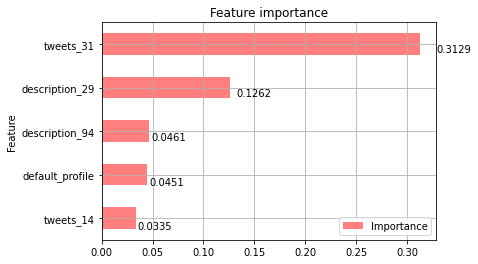

In [13]:
top_5_features = df_var_imp[:5].sort_values('Importance').set_index('Feature')
ax = top_5_features.plot.barh(color='red', alpha=0.5, grid=True, title='Feature importance', figsize=(6, 4))
for p, value in zip(ax.patches, top_5_features['Importance']):
    ax.annotate(round(value, 4), (p.get_width() * 1.05, p.get_y() * 1.02))